In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.read_csv("AppleStore.csv")
data2 = pd.read_csv("googleplaystore.csv")

apple_data = pd.DataFrame()
apple_data["name"] = data1["track_name"]
apple_data["size"] = data1["size_bytes"]/1000000
apple_data["price"] = data1["price"]
apple_data["reviews"] = data1["rating_count_tot"]
apple_data["rating"] = data1["user_rating"]
apple_data["category"] = data1["prime_genre"]
apple_data["profit"] = apple_data["price"]*apple_data["reviews"]
print("Apple Total")
apple_data.describe()

Apple Total


,size,price,reviews,rating,profit
count,7197.000000,7197.000000,7.197000e+03,7197.000000,7.197000e+03
mean,199.134454,1.726218,1.289291e+04,3.526956,5.009091e+03
std,359.206914,5.833006,7.573941e+04,1.517948,5.468756e+04
min,0.589824,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,46.922752,0.000000,2.800000e+01,3.500000,0.000000e+00
50%,97.153024,0.000000,3.000000e+02,4.000000,0.000000e+00
75%,181.924864,1.990000,2.793000e+03,4.500000,3.395700e+02
max,4025.969664,299.990000,2.974676e+06,5.000000,3.648864e+06


In [14]:
print("Apple Free")
apple_free = apple_data[apple_data["price"]==0]
apple_free.describe()

Apple Free


,size,price,reviews,rating,profit
count,4056.000000,4056.0,4.056000e+03,4056.000000,4056.0
mean,147.935700,0.0,1.974980e+04,3.376726,0.0
std,208.901358,0.0,9.774428e+04,1.644807,0.0
min,0.767126,0.0,0.000000e+00,0.000000,0.0
25%,54.041344,0.0,2.200000e+01,3.000000,0.0
50%,99.600384,0.0,4.660000e+02,4.000000,0.0
75%,161.198592,0.0,5.450750e+03,4.500000,0.0
max,3148.421120,0.0,2.974676e+06,5.000000,0.0


In [15]:
print("Apple Paid")
apple_paid = apple_data[apple_data["price"]!=0]
apple_paid.describe()

Apple Paid


,size,price,reviews,rating,profit
count,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03
mean,265.247840,3.955298,4038.537090,3.720949,1.147737e+04
std,481.232647,8.315882,25869.299527,1.311471,8.233864e+04
min,0.589824,0.990000,0.000000,0.000000,0.000000e+00
25%,36.942848,1.990000,31.000000,3.500000,7.029000e+01
50%,92.291072,2.990000,193.000000,4.000000,5.522100e+02
75%,233.513984,4.990000,1335.000000,4.500000,4.251060e+03
max,4025.969664,299.990000,698516.000000,5.000000,3.648864e+06


In [16]:
google_data = pd.DataFrame()
google_data["name"] = data2["App"]
google_data["size"] = (data2["Size"].str.replace("M","")).apply(pd.to_numeric,errors='coerce')
google_data["price"] = (data2["Price"].str.replace("$","")).apply(pd.to_numeric,errors='coerce')
google_data["reviews"] = data2["Reviews"].apply(pd.to_numeric,errors='coerce')
google_data["rating"] = data2["Rating"]
google_data["category"] = data2["Category"]
google_data["installs"] = data2["Installs"].str.replace("+","").str.replace(",","").apply(pd.to_numeric,errors='coerce')
google_data["profit"] = google_data["price"]*google_data["reviews"]
print("Google Total")
google_data.describe()

Google Total


,size,price,reviews,rating,installs,profit
count,8829.000000,10840.000000,1.084000e+04,9367.000000,1.084000e+04,1.084000e+04
mean,22.270540,1.027368,4.441529e+05,4.193338,1.546434e+07,4.918750e+03
std,22.628691,15.949703,2.927761e+06,0.537431,8.502936e+07,2.279092e+05
min,1.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,5.400000,0.000000,3.800000e+01,4.000000,1.000000e+03,0.000000e+00
50%,14.000000,0.000000,2.094000e+03,4.300000,1.000000e+05,0.000000e+00
75%,31.000000,0.000000,5.477550e+04,4.500000,5.000000e+06,0.000000e+00
max,100.000000,400.000000,7.815831e+07,19.000000,1.000000e+09,1.661218e+07


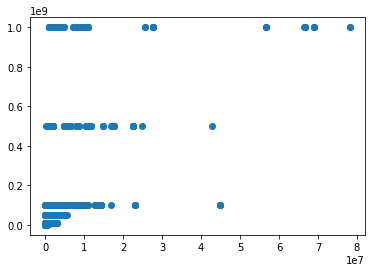

In [31]:
plt.scatter(google_data["reviews"],google_data["installs"])

LinAlgError: SVD did not converge in Linear Least Squares

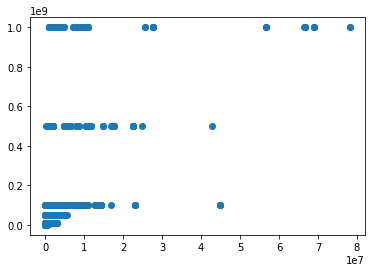

In [32]:
df = google_data.groupby("installs")["reviews"].mean()
a = np.array(google_data["reviews"])
b = np.array(google_data["installs"])
plt.scatter(a,b)

z = np.polyfit(a.flatten(), b.flatten(), 1)
p = np.poly1d(z)
plt.plot(a,p(a),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 

In [38]:
print("Google Free")
google_free = google_data[google_data["price"]==0]
google_free.describe()

Google Free


,size,price,reviews,rating,installs,profit
count,8175.000000,10040.0,1.004000e+04,8719.000000,1.004000e+04,10040.0
mean,22.345761,0.0,4.786134e+05,4.186203,1.668929e+07,0.0
std,22.648567,0.0,3.039342e+06,0.512338,8.823706e+07,0.0
min,1.000000,0.0,0.000000e+00,1.000000,0.000000e+00,0.0
25%,5.500000,0.0,4.500000e+01,4.000000,5.000000e+03,0.0
50%,14.000000,0.0,2.963500e+03,4.300000,1.000000e+05,0.0
75%,30.000000,0.0,6.667825e+04,4.500000,5.000000e+06,0.0
max,100.000000,0.0,7.815831e+07,5.000000,1.000000e+09,0.0


In [39]:
print("Google Paid")
google_paid = google_data[google_data["price"]!=0]
google_paid.describe()

Google Paid


,size,price,reviews,rating,installs,profit
count,654.000000,800.000000,8.000000e+02,648.000000,8.000000e+02,8.000000e+02
mean,21.330275,13.920837,1.167331e+04,4.289352,9.119510e+04,6.664906e+04
std,22.374559,57.195358,1.210643e+05,0.796434,6.342034e+05,8.369700e+05
min,1.000000,0.990000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,4.325000,1.490000,7.000000e+00,4.100000,1.000000e+02,1.998000e+01
50%,13.000000,2.990000,9.850000e+01,4.400000,1.000000e+03,3.332950e+02
75%,32.000000,4.990000,1.358000e+03,4.600000,1.000000e+04,5.945830e+03
max,100.000000,400.000000,2.376564e+06,19.000000,1.000000e+07,1.661218e+07


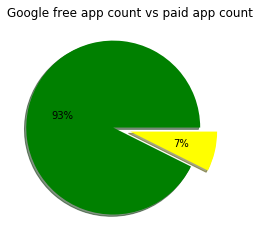

In [40]:
plt.pie([len(google_free.index),len(google_paid.index)],autopct='%1.0f%%',colors = ["green","yellow"],explode= (0.2,0),shadow = True)
plt.title("Google free app count vs paid app count");

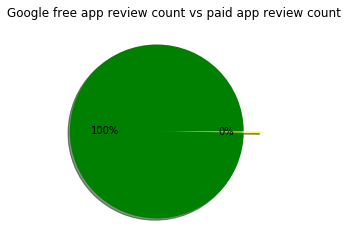

In [41]:
plt.pie([google_free.reviews.sum(),google_paid.reviews.sum()] ,autopct='%1.0f%%',colors = ["green","yellow"],explode= (0.2,0),shadow = True)
plt.title("Google free app review count vs paid app review count");

In [42]:
bins = [0, 0.99, 2.99, 4.99, 10.99, 14.99, 29.99]
labels = ['Under 0.99', '0.99-2.99', '2.99 - 4.99', '4.99-10.99', '10.99-14.99', '14.99-29.99']
google_paid["price_range"] = pd.cut(google_paid["price"],bins = bins, labels=labels)

C:\Users\tivme\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


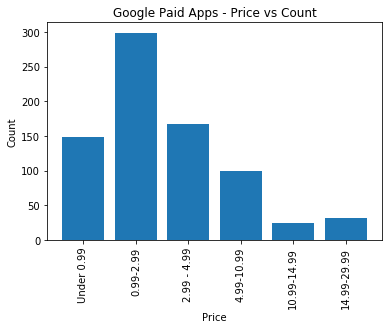

In [43]:
df = google_paid.groupby("price_range")["profit"].count()
plt.bar(df.index.values,df)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Google Paid Apps - Price vs Count")
plt.xticks(rotation = 90);

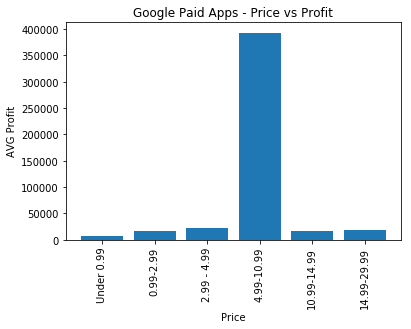

In [44]:
df = google_paid.groupby("price_range")["profit"].mean()
plt.bar(df.index.values,df)
plt.xlabel("Price")
plt.ylabel("AVG Profit")
plt.title("Google Paid Apps - Price vs Profit")
plt.xticks(rotation = 90);

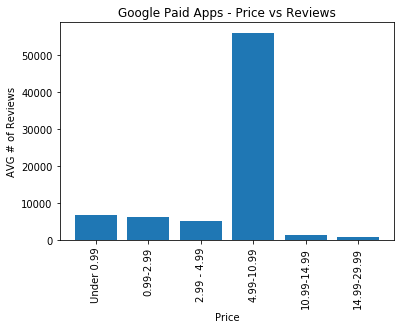

In [45]:
df = google_paid.groupby("price_range")["reviews"].mean()
plt.bar(df.index.values,df)
plt.xlabel("Price")
plt.ylabel("AVG # of Reviews")
plt.title("Google Paid Apps - Price vs Reviews")
plt.xticks(rotation = 90);

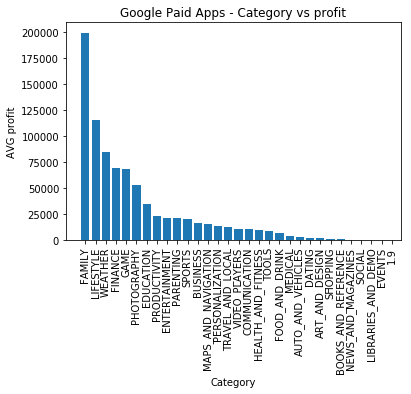

In [46]:
df = google_paid.groupby("category")["profit"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Category")
plt.ylabel("AVG profit")
plt.title("Google Paid Apps - Category vs profit")
plt.xticks(rotation = 90);


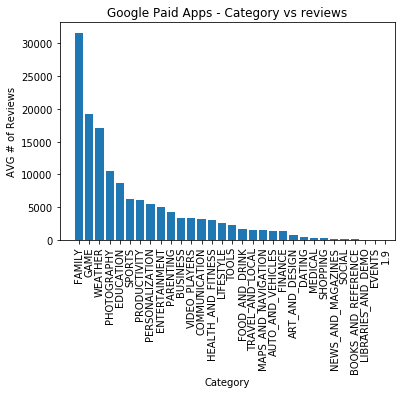

In [47]:
df = google_paid.groupby("category")["reviews"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Category")
plt.ylabel("AVG # of Reviews")
plt.title("Google Paid Apps - Category vs reviews")
plt.xticks(rotation = 90);

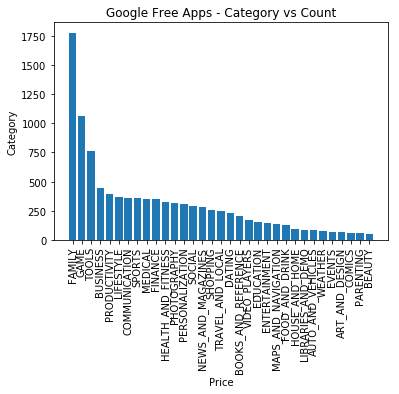

In [48]:
df = google_free.groupby("category")["reviews"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Price")
plt.ylabel("Category")
plt.title("Google Free Apps - Category vs Count")
plt.xticks(rotation = 90);

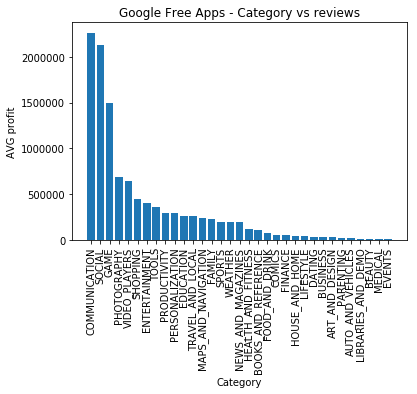

In [49]:
df = google_free.groupby("category")["reviews"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Category")
plt.ylabel("AVG profit")
plt.title("Google Free Apps - Category vs reviews")
plt.xticks(rotation = 90);

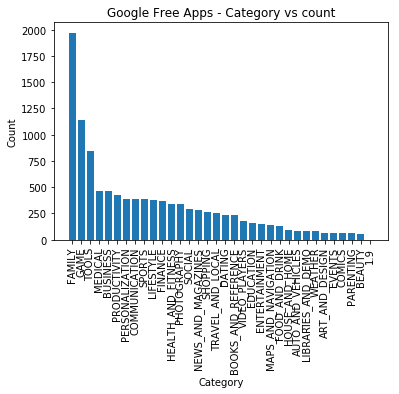

In [50]:
df = google_data.groupby("category")["reviews"].count().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Google Free Apps - Category vs count")
plt.xticks(rotation = 90);

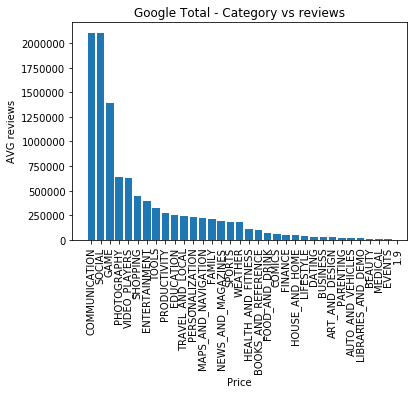

In [51]:
df = google_data.groupby("category")["reviews"].mean().sort_values(ascending=False)
plt.bar(df.index.values,df)
plt.xlabel("Price")
plt.ylabel("AVG reviews")
plt.title("Google Total - Category vs reviews")
plt.xticks(rotation = 90);

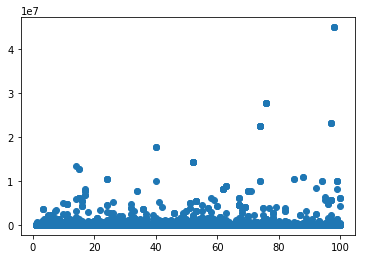

In [52]:
plt.scatter(google_data["size"],google_data["reviews"])
# plt.ylim(0,1000000)
# plt.xlim(0,2000)